In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [18]:
mass200 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/200BH.txt", delimiter = ',')
fmass200 = mass200[:,2]
avg200 = np.mean(fmass200[fmass200 > 1])

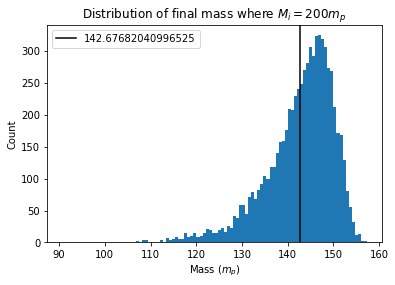

In [10]:
plt.hist(fmass200[fmass200 > 1], bins = 100)
plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/200BH.png")
plt.show()

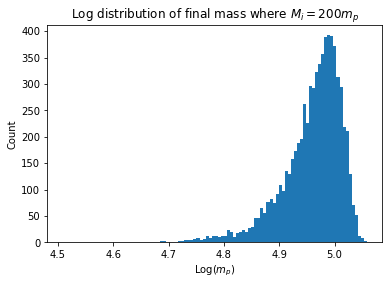

In [11]:
plt.hist(np.log(fmass200[fmass200 > 1]), bins = 100)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log200BH.png")
plt.show()

In [19]:
mass500 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/500BH.txt", delimiter = ',')
fmass500 = mass500[:,2]
avg500 = np.mean(fmass500[fmass500 > 1])

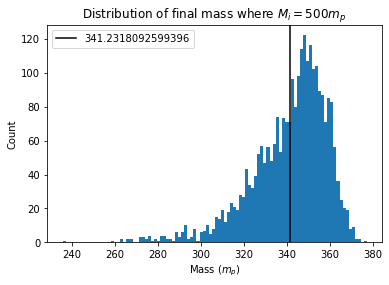

In [13]:
plt.hist(fmass500[fmass500 > 1], bins = 100)
plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/500BH.png")
plt.show()

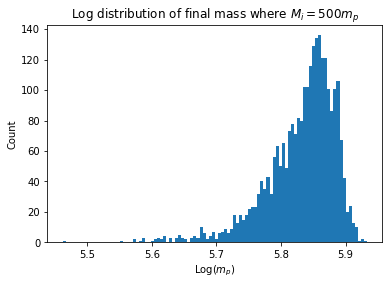

In [14]:
plt.hist(np.log(fmass500[fmass500 > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log500BH.png")
plt.show()

In [20]:
mass1k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/1000BH.txt", delimiter = ',')
fmass1k = mass1k[:,2]
avg1k = np.mean(fmass1k[fmass1k > 1])

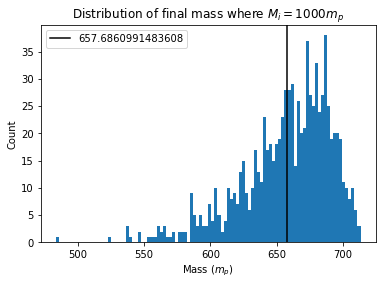

In [16]:
plt.hist(fmass1k[fmass1k > 1], bins = 100)
plt.axvline(np.mean(fmass1k[fmass1k > 1]), color = 'black', label = np.mean(fmass1k[fmass1k > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/1000BH.png")
plt.show()

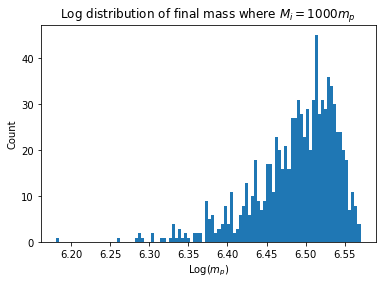

In [17]:
plt.hist(np.log(fmass1k[fmass1k > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log1000BH.png")
plt.show()

In [28]:
print("Average mass of extremal black hole is", (1000-avg1k)/1000*100,"% of the initial mass for m_i = 1000 mp")
print("Average mass of extremal black hole is",(500-avg500)/500*100,"% of the initial mass for m_i = 500 mp")
print("Average mass of extremal black hole is",(200-avg200)/200*100,"% of the initial mass for m_i = 200 mp")

Average mass of extremal black hole is 34.23139008516392 % of the initial mass for m_i = 1000 mp
Average mass of extremal black hole is 31.753638148012076 % of the initial mass for m_i = 500 mp
Average mass of extremal black hole is 28.661589795017377 % of the initial mass for m_i = 200 mp
